In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import sys; sys.path.insert(0,'..')
from main import *

In [2]:
X, y = load_svmlight_file('../data/phishing/phishing.txt')
X = X.toarray()

# Convert labels from {0, 1} to {-1, 1}
y = y * 2 - 1

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Only use some of training data
# sample_size = 1000
# random_samples = np.random.permutation(X_train.shape[0])[:sample_size]
# X_train = X_train[random_samples]
# y_train = y_train[random_samples]

In [3]:
# m = 100
# n = y_train.size

# m_rel = int(m * (m - 1) / 2)

# idx = np.triu_indices(n, k=1)
# idx = np.hstack((idx[0].reshape(-1, 1), idx[1].reshape(-1, 1)))

# save_row = np.random.choice(idx.shape[0], size=m_rel, replace=False)
# save_idx = idx[save_row]

In [4]:
# X_new = np.full(shape=(m_rel, 2 * X_train.shape[1]), fill_value=np.NaN)
# y_new = np.full(shape=m_rel, fill_value=np.NaN)
# k = 0

# for (i,j) in save_idx:

#     X_new[k] = np.hstack((X_train[i], X_train[j]))
    
#     if y_train[i] == y_train[j]:
#         y_new[k] = 0.5
#     elif y_train[i] > y_train[j]:
#         y_new[k] = 1.0
#     elif y_train[i] < y_train[j]:
#         y_new[k] = 0.0
#     k += 1

In [5]:
# def generate_rank_labels(X_train, y_train, m):
#     """ """
    
#     n = y_train.size

#     m_rel = int(m * (m - 1) / 2)

#     idx = np.triu_indices(n, k=1)
#     idx = np.hstack((idx[0].reshape(-1, 1), idx[1].reshape(-1, 1)))

#     save_row = np.random.choice(idx.shape[0], size=m_rel, replace=False)
#     save_idx = idx[save_row]
    
#     X_new = np.full(shape=(m_rel, 2 * X_train.shape[1]), fill_value=np.NaN)
#     y_new = np.full(shape=m_rel, fill_value=np.NaN)
#     k = 0

#     for (i,j) in save_idx:

#         X_new[k] = np.hstack((X_train[i], X_train[j]))

#         if y_train[i] == y_train[j]:
#             y_new[k] = 0.5
#         elif y_train[i] > y_train[j]:
#             y_new[k] = 1.0
#         elif y_train[i] < y_train[j]:
#             y_new[k] = 0.0
#         k += 1
    
#     return X_new, y_new

In [6]:
# def generate_rank_W(X_train, y_train, m):
#     """ """

#     n = y_train.size
    
#     X_new, y_new = generate_rank_labels(X_train, y_train, m)
    
#     svr = LinearSVR()
#     svr.fit(X_new, y_new)

#     X_pair = np.full(shape=(n * n, 2 * X_train.shape[1]), fill_value=np.NaN)
#     k = 0

#     """ MAY ONLY WANT TO STOP HALFWAY """
#     for i in range(n):
#         for j in range(n):
#             X_pair[k] = np.hstack((X_train[i], X_train[j]))
#             k += 1

#     y_pair = svr.predict(X_pair)
#     y_pair = minmax_scale(y_pair, feature_range=(0, 1))
#     W = y_pair.reshape(n, n)
    
#     return W

In [7]:
svm_arr, tree_arr = data_size_experiment(X, y, rank=True)

Progress:
1
2


/Users/Ashtekar15/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3


/Users/Ashtekar15/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4


/Users/Ashtekar15/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5
6


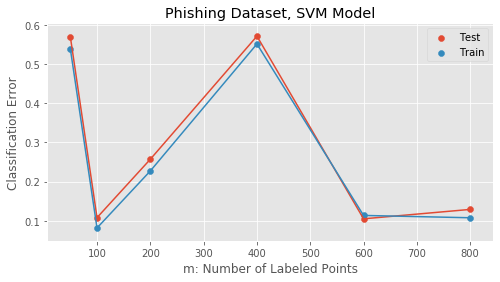

In [8]:
plot_err(svm_arr, 'Phishing', 'SVM', save=False)

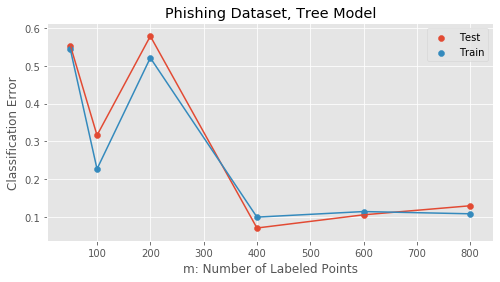

In [9]:
plot_err(tree_arr, 'Phishing', 'Tree', save=False)

In [10]:
%load_ext autoreload
%autoreload 2